# Cardiovascular Disease Detection in Python - Supervised Learning

### This code is for Learning purposes, It is based on the implementation of the  following tutorial 

https://www.youtube.com/watch?v=kySc5Wg1Gxw

##### Based on Various Features, Demographics and Habits we will predict how likely a person is to develop a cardiovesular Disease.

In [81]:
# Importing Modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
#  As mentioned in the Tutorial to upload data in Google Colab 
# instanse use the below code, Right now commenting this as no use.

""" 
from google.colab import files
uploaded = files.upload()

"""
# It will prompt to uplad the file once done will be able to use the file from the working Directory.

' \nfrom google.colab import files\nuploaded = files.upload()\n\n'

In [7]:
# Reading the Data
df = pd.read_csv('cardio_train.csv', sep = ";")

In [9]:
#Printing the head to have the basic Idea of how data looks.
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# Getting the Shape of the Data
df.shape

(70000, 13)

In [12]:
# Counting the NA values in the Dataframe to handle missing values
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [19]:
#  This is to make sure we have no missing values in the data and we will not 
#  be moving forward with missing values, if it exists will raise an error
assert not df.isnull().values.any()

In [20]:
#  To Check the basic outlines of data can be very useful have an Intital Look.
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
'{}%'.format(round((2467/19468)*100))

'13%'

In [28]:
# Get the Count of Patients having Cardiovescular Disease or not 

df['cardio'].value_counts()


0    35021
1    34979
Name: cardio, dtype: int64

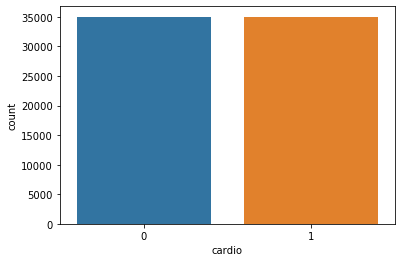

In [29]:
#  To visualize the above
sns.countplot(df['cardio'])

In [32]:
#  Creating a column named "years" to see patents state with respect to their age.

df['years'] = (df['age']/365).round(0).astype(int)

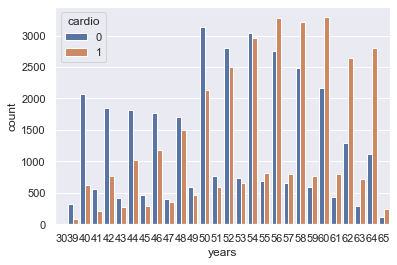

In [40]:
# Visualizing years with respect to patient's age 

sns.set(style = "darkgrid")
sns.countplot(x = "years", data = df, hue = "cardio")

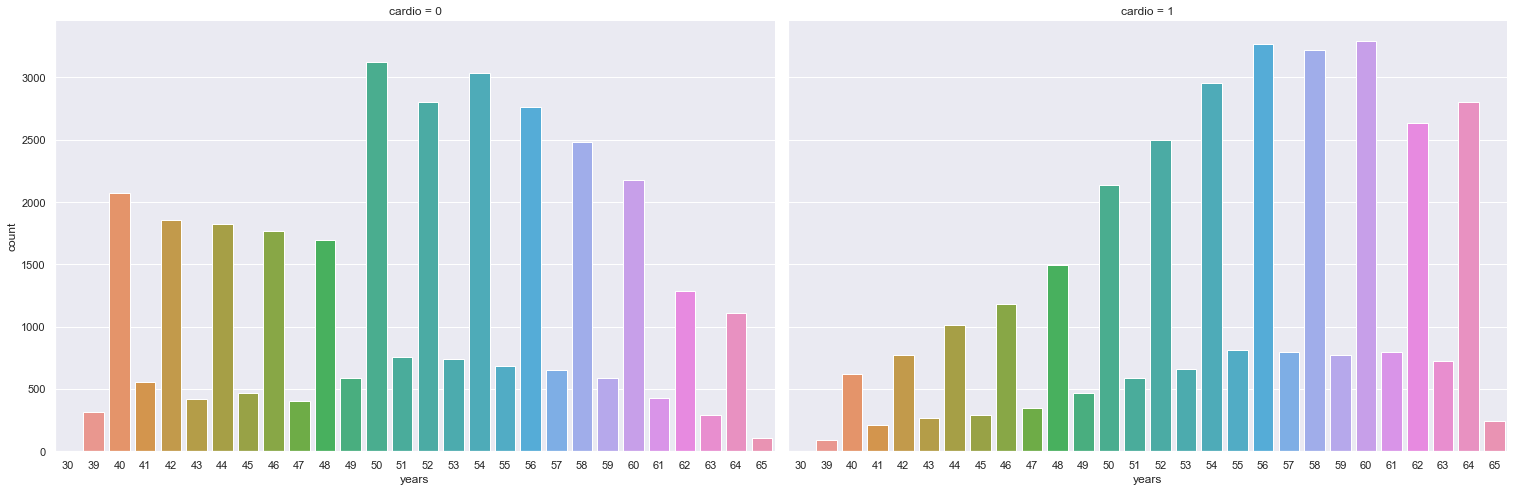

In [48]:
#  A better way to visualize this is to use a category plot

sns.catplot(x="years", col="cardio",
                data=df, kind="count",
                height=7, aspect=1.5);

### Why Co-relation ? https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4

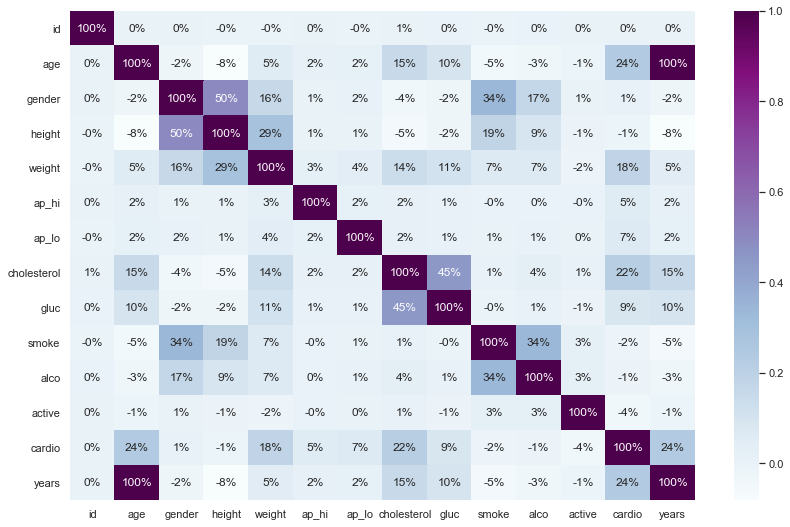

In [70]:
#  Check Co-relation between the features
corr = df.corr()
plt.figure(figsize = (14,9))
sns.heatmap(corr, annot = True, fmt = ".0%", cmap ='BuPu')

In [71]:
#  Dropping "Years" Column as we don't need it data set has an age column

df = df.drop('years', axis = 1)

In [73]:
# Remving the "id" Column as it has no Computation impact involved

df = df.drop('id', axis = 1)

In [74]:
# Splittig Data into Features and Label , Features are the patient Characterstics, properties, attributes
# Label is the Target Column which we will be predicting
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [76]:
# Split the Data into Test and Training Set 75 % train on which our Model is going to train, 25 % is For Testing and Validation

X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.25 , random_state = 1) 

In [80]:
print('X_train has a shape of {}'.format(X_train.shape))
print('X_test has a shape of  {}'.format(X_test.shape))
print('Y_train has a shape of {}'.format(Y_train.shape))
print('Y_test has a shape of  {}'.format(Y_test.shape))

X_train has a shape of (52500, 11)
X_test has a shape of  (17500, 11)
Y_train has a shape of (52500,)
Y_test has a shape of  (17500,)


### Why Feature scaling is so important ? 
##### ML algorithm works better when features are relatively on a similar scale and close to Normal Distribution.

#### References
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

https://medium.com/analytics-vidhya/why-scaling-is-important-in-machine-learning-aee5781d161a 

In [ ]:
# Feature Scaling / Normalization / Standardization.


